In [1]:
import tensorflow as tf

/Users/toanpv/tensorflow_tutorial/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/Users/toanpv/tensorflow_tutorial/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/toanpv/tensorflow_tutorial/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
import numpy as np

In [4]:
# X = [1, 2, 3, 4] <=> [x0, x1, x2, x3]
# Y = [2] <=> w_init + w_0*x_0 + ... + w_3*x3

# Fake X data

X_data = np.random.random((10000, 2))

# Fake sample weights
sample_weights = np.array([3, 4]).reshape(2, )

# Fake y_data

y_data = np.matmul(X_data, sample_weights)

In [5]:
X_data[0]

array([0.65583543, 0.57682504])

In [6]:
y_data[0]

4.274806465369436

In [7]:
# Approximation Y

y_data = np.add(y_data, np.random.uniform(-0.5, 0.5))

In [8]:
y_data[0]

3.9785684452742682

In [12]:
y_data = y_data.reshape(len(y_data), 1)

In [13]:
y_data.shape

(10000, 1)

In [14]:
X_data

array([[0.65583543, 0.57682504],
       [0.091453  , 0.42468394],
       [0.51093064, 0.11294444],
       ...,
       [0.52450617, 0.10092505],
       [0.63178597, 0.03822244],
       [0.17647753, 0.67757735]])

In [15]:
y_data

array([[3.97856845],
       [1.67685672],
       [1.68833163],
       ...,
       [1.68098069],
       [1.75200965],
       [2.94350398]])

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [18]:
X_train.shape

y_train.shape

(8000, 1)

In [19]:
n_dim = X_train.shape[1]

print(n_dim)

2


In [23]:
# Placeholder for pass data

X = tf.placeholder(tf.float32, [None, n_dim])

Y = tf.placeholder(tf.float32, [None, 1])

In [24]:
# Trainable weights

W = tf.Variable(tf.ones([n_dim, 1]))

b = tf.Variable(np.random.randn(), dtype=tf.float32)

In [25]:
pred = tf.add(tf.matmul(X, W), b)

In [26]:
loss = tf.reduce_mean(tf.square(pred - Y))

learning_rate = 0.01

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

In [27]:
init = tf.global_variables_initializer()

In [28]:
sess = tf.Session()

In [39]:
# Training

sess.run(init)

epochs = 5000

loss_history = []

for epoch in range(epochs):
    sess.run(optimizer, feed_dict={X: X_train, Y: y_train})
    
    test_loss = sess.run(loss, feed_dict={X : X_test, Y: y_test})
    
    loss_history.append(test_loss)
    
    if epoch % 500 == 0:
        print("Epoch {} Test loss = {}".format(epoch, test_loss))
        
print("Training finished")

Epoch 0 Test loss = 1.0553468465805054
Epoch 500 Test loss = 0.3295522630214691
Epoch 1000 Test loss = 0.10972090065479279
Epoch 1500 Test loss = 0.03668598458170891
Epoch 2000 Test loss = 0.012294578365981579
Epoch 2500 Test loss = 0.004125455394387245
Epoch 3000 Test loss = 0.001385211362503469
Epoch 3500 Test loss = 0.0004652596835512668
Epoch 4000 Test loss = 0.0001562972756801173
Epoch 4500 Test loss = 5.2511084504658356e-05
Training finished


In [40]:
sess.run(W)

array([[2.989829 ],
       [3.9896328]], dtype=float32)

In [41]:
sess.run(b)

-0.28536725

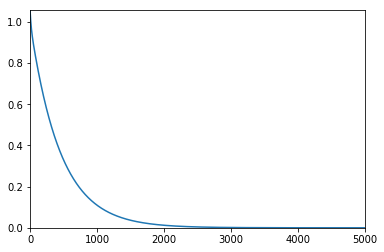

In [44]:
import matplotlib.pyplot as plt

plt.plot(range(len(loss_history)), loss_history)
plt.axis([0, epochs, 0, np.max(loss_history)])
plt.show()

In [53]:
pred_y = sess.run(pred, feed_dict={
    X : [[3, 10]]
})

In [54]:
print(pred_y)

[[48.58045]]
